# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
# Import necessary libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import os
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load data from csv and labeling the data 
* csv file contains two columns: review and 
* new collumn to be add is sentinment with labels negative ,neutral and positive 
* when rating is less than 3 it is negative, when rating is 3 it is neutral and when rating is greater than 3 it is positive 

In [3]:
# Define the path to the manually downloaded dataset
data_path = "data/tripadvisor_hotel_reviews.csv"  # Update the file name if it's different

# Check if the file exists before attempting to load
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset file not found at {data_path}. Ensure the file is in the correct location.")

# Load the dataset
data = pd.read_csv(data_path)
print("Dataset loaded successfully!")


# Map ratings to sentiment categories
def map_rating_to_sentiment(rating):
    if rating in [1, 2]:
        return "negative"
    elif rating == 3:
        return "neutral"
    elif rating in [4, 5]:
        return "positive"

data['sentiment'] = data['Rating'].apply(map_rating_to_sentiment)

# Inspect the dataset
data.head()

# Set display options to show all rows and columns for analysis
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(data)


Dataset loaded successfully!


Review  Rating sentiment
0      nice hotel expensive parking got good deal sta...       4  positive
1      ok nothing special charge diamond member hilto...       2  negative
2      nice rooms not 4* experience hotel monaco seat...       3   neutral
3      unique, great stay, wonderful time hotel monac...       5  positive
4      great stay great stay, went seahawk game aweso...       5  positive
5      love monaco staff husband stayed hotel crazy w...       5  positive
6      cozy stay rainy city, husband spent 7 nights m...       5  positive
7      excellent staff, housekeeping quality hotel ch...       4  positive
8      hotel stayed hotel monaco cruise, rooms genero...       5  positive
9      excellent stayed hotel monaco past w/e delight...       5  positive
10     poor value stayed monaco seattle july, nice ho...       2  negative
11     nice value seattle stayed 4 nights late 2007. ...       4  positive
12     nice hotel good location hotel kimpton design ...       4  positive
13     nice hotel not nice staff hotel lovely staff q...       3   neutral
14     great hotel night quick business trip, loved l...       4  positive
15     horrible customer service hotel stay february ...       1  negative
16     disappointed say anticipating stay hotel monac...       2  negative
17     fantastic stay monaco seattle hotel monaco hol...       5  positive
18     good choice hotel recommended sister, great lo...       5  positive
19     hmmmmm say really high hopes hotel monaco chos...       3   neutral
20     service service service spent week g-friend la...       5  positive
21     excellent stay, delightful surprise stay monac...       5  positive
22     good value downtown hotel monaco seattle great...       4  positive
23     hotel monaco great location service hotel mona...       5  positive
24     great location need internally upgrade advanta...       2  negative
25     n't mind noise place great, read reviews noise...       3   neutral
26     loved, stayed warwick overnight getway enjoy c...       4  positive
27     met expectations centrally located hotel block...       3   neutral
28     nice hotel husband stayed warwick 4 years ago ...       4  positive
29     good hotel not large hotel newly decorated, ro...       4  positive
30     good choice seattle stayed night business book...       4  positive
31     great location expensive parking warwick heart...       4  positive
32     noise airconditioner-a standard, arranged stay...       1  negative
33     good location poor cleanliness warwick hotel g...       2  negative
34     good place spending big bucks warwick plenty c...       4  positive
35     nice hotel trip seattle wanted stay downtown, ...       4  positive
36     great value seattle spouse stayed warwick seat...       4  positive
37     gem hotel absolute gem, small great service, r...       5  positive
38     pretty good value visit seattle frequently, 1 ...       4  positive
39     average nice stay hotel amazing location great...       4  positive
40     bad choice, booked hotel hot wire called immed...       1  negative
41     good value hotel stayed warwick times past yea...       4  positive
42     warwick bad good reviews warwick shocks staff ...       2  negative
43     great service warwick just recently spent 4 da...       4  positive
44     austin powers decor familiar, hotel seattlewhe...       2  negative
45     great location n't stay long needed place stay...       2  negative
46     pay read reviews booked knew getting, mind n't...       3   neutral
47     not bad location unmatchable price range, simp...       3   neutral
48     remarkable hotel needed days booked inn based ...       5  positive
49     great location friendly staff stayed hotel eas...       5  positive
50     excellent way stayed inn market memorial day w...       5  positive
51     amazing location great views fabulous boutique...       4  positive
52     outstanding choice reserved city view room nig...       5  positive


## Perform Exploratory Data Analysis (EDA)


Class distribution:
sentiment
positive    15093
negative     3214
neutral      2184
Name: count, dtype: int64

Text length stats:
count    20491.000000
mean       724.896833
std        689.101024
min         44.000000
25%        339.000000
50%        537.000000
75%        859.000000
max      13501.000000
Name: text_length, dtype: float64


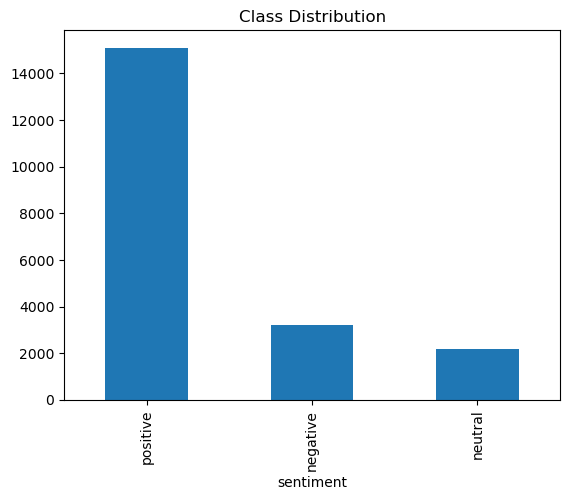

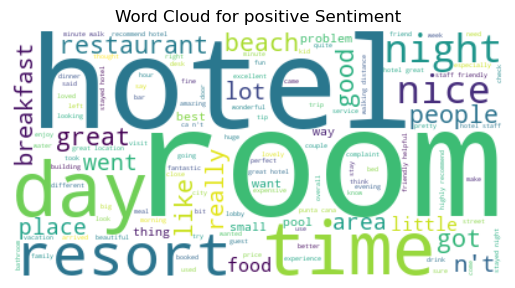

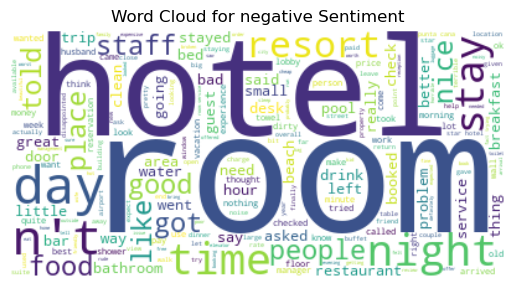

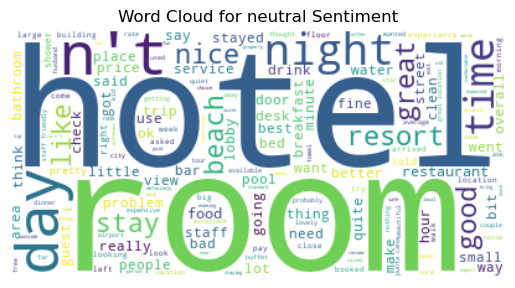

In [5]:
# Perform Exploratory Data Analysis (EDA)
def perform_eda(data):
    # Check class distribution
    print("Class distribution:")
    print(data['sentiment'].value_counts())

    # Text length analysis
    data['text_length'] = data['Review'].apply(len)
    print("\nText length stats:")
    print(data['text_length'].describe())

    # Visualize class distribution
    data['sentiment'].value_counts().plot(kind='bar', title="Class Distribution")
    plt.show()

    # Word cloud for positive, negative, and neutral reviews
    for sentiment in ['positive', 'negative', 'neutral']:
        text = " ".join(data[data['sentiment'] == sentiment]['Review'])
        wordcloud = WordCloud(stopwords=stopwords.words('english'), background_color='white').generate(text)
        plt.figure()
        plt.title(f"Word Cloud for {sentiment} Sentiment")
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

perform_eda(data)

## Data review and cleaning
so taking a look to our data we can see there are a lot of words that are domain specific and not useful for our analysis so we should remove them <br>
There is also a noticeable class imbalance: 
    * Positive reviews dominate, which could make a machine learning model biased toward predicting positive sentiments.
    * Techniques like oversampling (e.g., SMOTE), undersampling, or class-weight adjustments in algorithms can address this issue.
   *  Neutral reviews are the least represented class, which might challenge the model to differentiate between neutral and other sentiments.
<br>
So we begin with data cleaning and preprocessing to remove irrelevant information and standardize the text format. And then we begin handling domain specific words and sentiment specific words

In [ ]:
# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

data['cleaned_review'] = data['Review'].apply(clean_text)

# Tokenization and stop word removal
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    return " ".join(filtered_tokens)

data['processed_review'] = data['cleaned_review'].apply(tokenize_and_remove_stopwords)